## 310. Minimum Height Trees

### Description

A tree is an undirected graph in which any two vertices are connected by exactly one path. In other words, any connected graph without simple cycles is a tree.

Given a tree of $n$ nodes labelled from 0 to $n - 1$, and an array of $n - 1$ edges where edges$[i] = [a_i, b_i]$ indicates that there is an undirected edge between the two nodes $a_i$ and $b_i$ in the tree, you can choose any node of the tree as the root. When you select a node $x$ as the root, the result tree has height h. Among all possible rooted trees, those with minimum height (i.e. $min(h)$)  are called minimum height trees (MHTs).

Return a list of all MHTs' root labels. You can return the answer in any order.

The height of a rooted tree is the number of edges on the longest downward path between the root and a leaf.

### Example

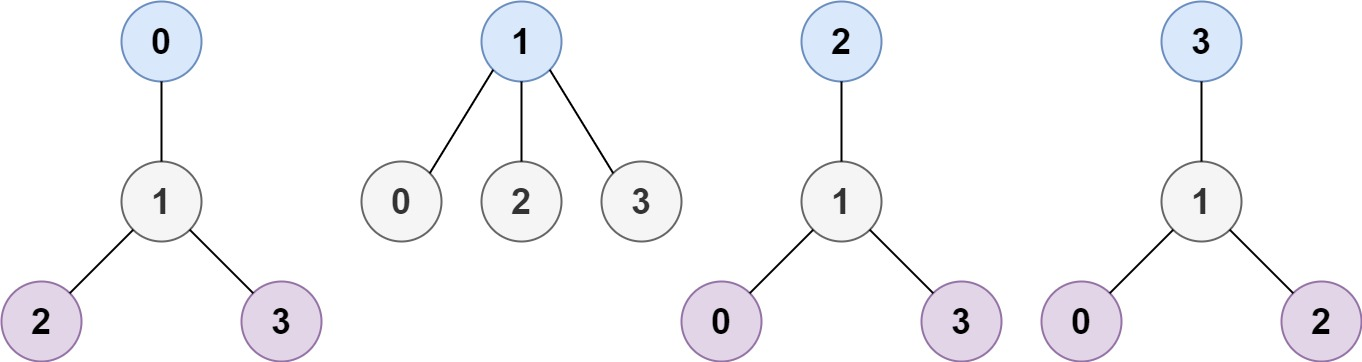

Input: $n = 4$, edges = $[[1,0],[1,2],[1,3]]$

Output: $[1]$

Explanation: As shown, the height of the tree is 1 when the root is the node with label 1 which is the only MHT.

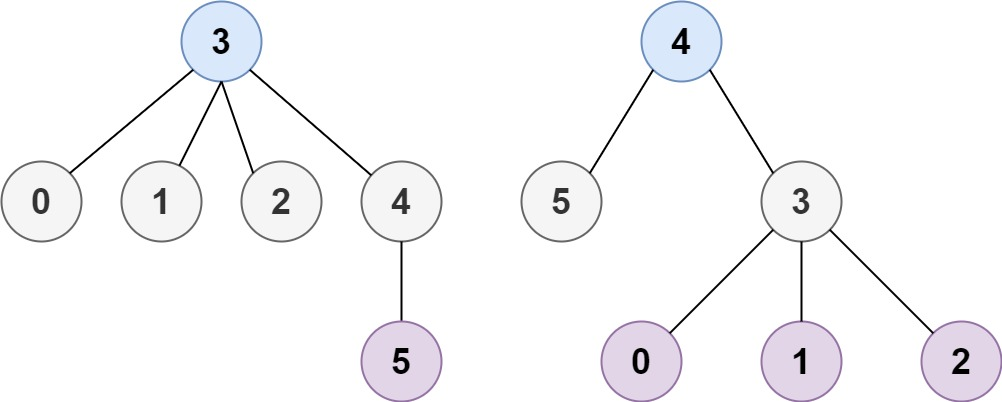

Input: $n = 6$, edges = $[[3,0],[3,1],[3,2],[3,4],[5,4]]$

Output: $[3,4]$


### Solution (BFS - Remove Leaf Nodes)

Recall an important definition called BFS tree, which stands for the order of nodes being visited when BFS is applied. Main property of BFS tree is: Nodes in each layer of BFS tree are all neighbors of nodes in the previous one. This question asks us to find the minimum height trees of a graph. A minimum height tree is a tree where the maximum distance from any leaf node to the root is minimized, which is equivelent to find the root node of BFS tree with minimum height. We can do that by removing leaf nodes in the graph at the beginning of each iteration in BFS, the remaining ones would be our desired root nodes of MHT. 

Algorithm will look like this:

1. Build the graph using the input edges, also use a dictionary to store the degree of each node in graph

2. For node with degree of 1, add it to the queue

3. While queue is not empty, clear the result list since because they are not the root nodes we want (there are still leaf nodes in the graph). For each node in the queue, add it to the result list and for its neighbors with degree equals to 1 after decrementing, add them to queue. So on and so fourth. 

4. Return the result list

In [1]:
import collections

def MHT(n, edges):
    if n == 1:
        return [0]
    
    #Build the graph from input
    g = collections.defaultdict(list)
    degree = [0 for _ in range(n)]
    for u, v in edges:
        g[u].append(v)
        g[v].append(u)
        degree[u] += 1
        degree[v] += 1

    ans = []

    #Initialize the queue and add all leaf nodes to it
    queue = collections.deque()
    for v in g.keys():
        if degree[v] == 1:
                queue.append(v)

    #BFS
    while queue:
        #Clear the result list since there are unprocessed nodes in the queue
        ans.clear()
        for i in range(len(queue)):
            curr_node = queue.popleft()
            ans.append(curr_node)

            #Check if there is any neighbor of curr_node that is leaf
            for neighbor in g[curr_node]:
                degree[neighbor] -= 1
                if degree[neighbor] == 1:
                    queue.append(neighbor)

    return ans


roots = MHT(6, [[3,0],[3,1],[3,2],[3,4],[5,4]])
print(f"Roots of MHT are: {roots}")

Roots of MHT are: [3, 4]


### Time complexity

$O(n+m)$, where $n$ is the number of vertices and $m$ is the number of edges.